# Breast Cancer Project using PyTorch

In this project, we aim to classify breast cancer tumors as malignant or benign using the Breast Cancer dataset. 
We will use PyTorch to build and train a machine learning model.  
The main steps in this project are:
1. Load and preprocess the dataset.
2. Convert the data into PyTorch tensors.
3. Build and train a neural network using PyTorch.
4. Evaluate the model's performance.

Let's begin with loading the dataset and preparing it for PyTorch.


In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



## Step 1: Load the Dataset

We will use the Breast Cancer dataset from the `sklearn` library. 
The dataset contains features related to breast cancer cells, and the goal is to classify whether the tumor is malignant or benign.


In [35]:
# load the dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the dataset into Train (80%) and Test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split Train into Training (80%) and Validation (20% of Train)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)



## Step 2: Data Preprocessing

In this step, we will:
1. Standardize the features to have mean 0 and standard deviation 1, which helps improve the model's performance.
2. Convert the data into PyTorch tensors, so it can be used for training a neural network.

Let's start by standardizing the features and converting the data into tensors.


### Standardizing the Features

We will use `StandardScaler` to standardize the features. This step ensures that each feature has a mean of 0 and a standard deviation of 1.


In [36]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

### Converting the Data to PyTorch Tensors

To use the data with PyTorch, we need to convert the features (`X_train`, `X_val`, `X_test`) and the labels (`y_train`, `y_val`, `y_test`) into PyTorch tensors.


In [37]:
# Convert the data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

# Convert target labels to torch.long because classification tasks require integer labels for 
# loss functions like CrossEntropyLoss, which expects class labels as integers (not float).
# Features are kept as torch.float32 for numerical operations in the model.
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

In [38]:
print("Training data shape:", X_train_tensor.shape)
print("Validation data shape:", X_val_tensor.shape)
print("Test data shape:", X_test_tensor.shape)


Training data shape: torch.Size([364, 30])
Validation data shape: torch.Size([91, 30])
Test data shape: torch.Size([114, 30])


## Step 3: Build the Neural Network Model

In this step, we will create a simple neural network model using PyTorch. The model will consist of:
- An input layer with 30 units (corresponding to the number of features in the dataset).
- A hidden layer with 64 units.
- An output layer with a single unit (for binary classification).

We will use the **ReLU** activation function for the hidden layer and a **sigmoid** activation function for the output layer, as it's a binary classification problem.


In [39]:
class BreastCancerModel(nn.Module):
    def __init__(self):
        super(BreastCancerModel, self).__init__()
        # Define the layers of the neural network
        self.input_layer = nn.Linear(30,64) # 30 input features, 64 neurons in the hidden layer
        self.hidden_layer = nn.ReLU() # ReLU activation function for the hidden layer
        self.output_layer = nn.Linear(64, 1) # Output layer with 1 unit for binary classification
        self.sigmoid = nn.Sigmoid()  # Sigmoid activation for binary classification
        
    def forward(self, x):
        # pass input through the network
        x = self.input_layer(x)
        x = self.hidden_layer(x)
        x = self.output_layer(x)
        x = self.sigmoid(x)
        return x

# Instantiate the model
model = BreastCancerModel()

# Print the model architecture
print(model)



BreastCancerModel(
  (input_layer): Linear(in_features=30, out_features=64, bias=True)
  (hidden_layer): ReLU()
  (output_layer): Linear(in_features=64, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


## Step 4: Define Loss Function and Optimizer

In this step, we will:
1. **Loss Function**: Use **Binary Cross-Entropy Loss** (also known as **BCELoss**) because this is a binary classification problem.
2. **Optimizer**: Use **Adam Optimizer**, which is widely used and generally works well for most deep learning models.

We will also specify the learning rate for the optimizer. Then, we will proceed to train the model.


Epoch [1/20], Loss: 0.6393, Accuracy: 73.35%
Validation Loss: 0.5569, Validation Accuracy: 85.71%
Epoch [2/20], Loss: 0.4782, Accuracy: 90.11%
Validation Loss: 0.4403, Validation Accuracy: 91.21%
Epoch [3/20], Loss: 0.3708, Accuracy: 93.13%
Validation Loss: 0.3562, Validation Accuracy: 91.21%
Epoch [4/20], Loss: 0.2947, Accuracy: 92.86%
Validation Loss: 0.2981, Validation Accuracy: 91.21%
Epoch [5/20], Loss: 0.2471, Accuracy: 93.41%
Validation Loss: 0.2579, Validation Accuracy: 92.31%
Epoch [6/20], Loss: 0.1981, Accuracy: 93.96%
Validation Loss: 0.2293, Validation Accuracy: 94.51%
Epoch [7/20], Loss: 0.1701, Accuracy: 94.51%
Validation Loss: 0.2087, Validation Accuracy: 94.51%
Epoch [8/20], Loss: 0.1468, Accuracy: 95.60%
Validation Loss: 0.1926, Validation Accuracy: 94.51%
Epoch [9/20], Loss: 0.1316, Accuracy: 96.43%
Validation Loss: 0.1816, Validation Accuracy: 94.51%
Epoch [10/20], Loss: 0.1180, Accuracy: 96.70%
Validation Loss: 0.1734, Validation Accuracy: 94.51%
Epoch [11/20], Loss

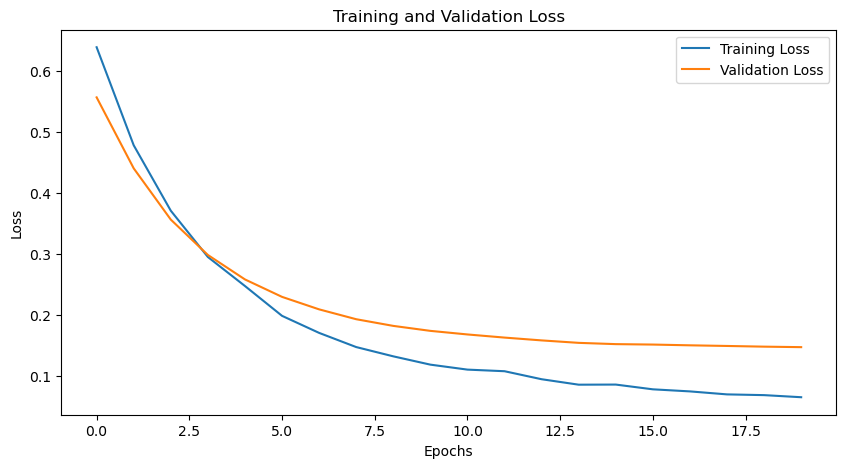

In [40]:
# Define Loss Function and Optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer with learning rate of 0.001

# Training the model
num_epochs = 20  # Number of epochs to train the model
batch_size = 32  # Batch size for training

# Create DataLoader for training, validation, and test sets
train_data = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

val_data = TensorDataset(X_val_tensor, y_val_tensor)
val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False)

# Initialize lists to store the loss values
train_losses = []
val_losses = []

# Training loop
for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        
        # Compute the loss
        loss = criterion(outputs.squeeze(), labels.float())  # Squeeze outputs to match labels shape
        
        # Backward pass
        loss.backward()

        # Optimize the model
        optimizer.step()

        # Track the loss and accuracy
        running_loss += loss.item()
        predicted = (outputs.squeeze() > 0.5).float()  # Convert output probabilities to class labels
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    # Track training loss and accuracy
    train_losses.append(running_loss / len(train_loader))
    epoch_accuracy = correct / total

    # Validation step (optional)
    model.eval()  # Set model to evaluation mode
    val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():  # No gradient calculation during validation
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs.squeeze(), labels.float())
            val_loss += loss.item()
            predicted = (outputs.squeeze() > 0.5).float()
            correct_val += (predicted == labels).sum().item()
            total_val += labels.size(0)

    val_losses.append(val_loss / len(val_loader))
    val_accuracy = correct_val / total_val
        # Print the epoch loss and accuracy
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss / len(train_loader):.4f}, Accuracy: {epoch_accuracy*100:.2f}%")
    print(f"Validation Loss: {val_loss / len(val_loader):.4f}, Validation Accuracy: {val_accuracy*100:.2f}%")

# Plotting Loss curve for Training and Validation
plt.figure(figsize=(10,5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

## Step 5.2: Confusion Matrix for Test Data

After training the model, we will evaluate it on the test set and plot the **Confusion Matrix**. The confusion matrix allows us to see how many predictions were correct and how many were misclassified for each class.


Test Loss: 0.0690, Test Accuracy: 96.49%


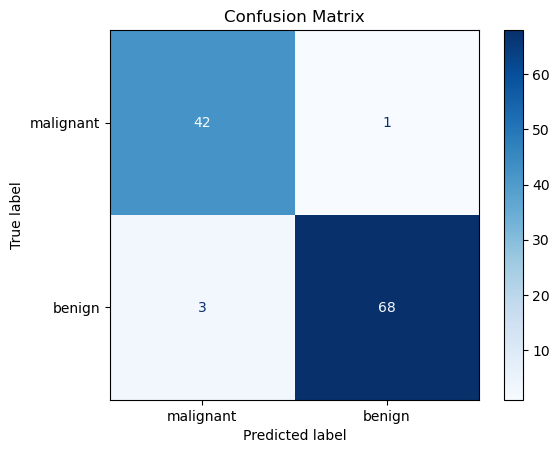

In [42]:
# Evaluate on the test set
model.eval()
test_data = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

test_loss = 0.0
correct_test = 0
total_test = 0
all_preds = []  # List to store all predictions
all_labels = []  # List to store all true labels

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), labels.float())
        test_loss += loss.item()
        
        # Collect predictions and true labels for the confusion matrix
        predicted = (outputs.squeeze() > 0.5).float()
        all_preds.append(predicted)
        all_labels.append(labels)

# Flatten the list of predictions and labels
all_preds = torch.cat(all_preds).numpy()
all_labels = torch.cat(all_labels).numpy()

# Calculate the accuracy
test_accuracy = (all_preds == all_labels).sum() / len(all_labels)
print(f"Test Loss: {test_loss / len(test_loader):.4f}, Test Accuracy: {test_accuracy*100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()
